# Boosting Trees

In [25]:
%matplotlib inline
from pylab import *
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

## Gradient Boosting 

Commencons par ajuster un regresseur par gradient boosting sur des familles d'arbres.

In [3]:
from sklearn.tree import DecisionTreeRegressor

####  Préparation des données housing

In [4]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [6]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
X_housing = california_housing.data
Y_housing = california_housing.target
print(shape(X_housing))

(20640, 8)


Pour éviter que les temps de calcul soient trop longs, nous allons travailler avec un sous échantillon:

In [9]:
from sklearn.utils import resample
X_housing, Y_housing  = resample(X_housing,Y_housing, n_samples = 2000, replace = False)

Découpage train / test :

In [10]:
X_housing_train, X_housing_test, y_housing_train, y_housing_test = \
train_test_split(X_housing,Y_housing,test_size=0.5)

####  Fonctions Gradient Boosting de sckit-learn

Importation des fonctions Gradient Boosting de sckit-learn et de la fonction `mean_squared_error` pour le calcul des erreurs quadratique moyennes.

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Nous ajustons maintenant un modèle GBM avec les paramètres proposés ci-dessous.

> Retrouver la signification de chacun des paramètres.

In [12]:
GBM = GradientBoostingRegressor(n_estimators=1000,
                                         max_depth=8,
                                         min_samples_split= 4,
                                         learning_rate=0.05,
                                         loss='squared_error')

print(GBM)

GradientBoostingRegressor(learning_rate=0.05, max_depth=8, min_samples_split=4,
                          n_estimators=1000)


+ n_estimators : ###TO DO ### ?
+ learning_rate =  ###TO DO ###?
+ loss : ###TO DO ### ?
+ max_depth : ###TO DO ### ?
+ min_samples_split  : ###TO DO ### ?

Pour calculer l'erreur mse sur le test (aussi appelée deviance dans la doc) :

In [13]:
GBM.fit(X_housing_train, y_housing_train)
mse = mean_squared_error(y_housing_test, GBM.predict(X_housing_test))
print(mse)

0.4487926292138901


Attention : le score renvoyé ci-dessous est un $R^2$ i.e. variance expliquée par le prédicteur / variance totale de $Y$, voir [ici](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination).

In [14]:
print(GBM.score(X_housing_test, y_housing_test))

0.647041562313992


Quelques principes à retenir:
+ Plus on ajuste d'arbres, plus le cout computationnel est élevé.
+ le nombre d'arbres correspond au nombre d'itérations.
+ Un taux d'apprentissage petit nécessitera plus d'arbres.
+ Un taux d'apprentissage trop élevé fera des sauts de gradients potentiellement trop grands, et au bout d'un certain nombre d'itérations il sera  difficile d'améliorer les scores.
+ Une bonne pratique consiste à choisir d'abord un taux d'apprentissage pas trop faible (pour ne pas faire exploser le nombre d'arbres) et à le diminuer ensuite, une fois ajustés les autres paramètres (nb de noeuds, profondeur ...).

#### Etude des erreurs le long des itérations -  learning rate

Nous allons maintenant étudier l'évolution de la perte en fonction du nombre d'itérations.

Noter que l'erreur d'apprentissage est accessible dans GBM:

In [15]:
print(GBM.train_score_)

[1.24110763e+00 1.13242673e+00 1.03441586e+00 9.45674196e-01
 8.65066591e-01 7.91901633e-01 7.25026513e-01 6.64785070e-01
 6.10040280e-01 5.60414394e-01 5.14015719e-01 4.73392992e-01
 4.35233650e-01 4.01087162e-01 3.69566538e-01 3.41556201e-01
 3.15205246e-01 2.91517823e-01 2.70246309e-01 2.49719328e-01
 2.32166096e-01 2.14726767e-01 1.98548674e-01 1.82905503e-01
 1.69205296e-01 1.56119138e-01 1.45545358e-01 1.34823684e-01
 1.25520284e-01 1.17325714e-01 1.09472089e-01 1.02050673e-01
 9.50943464e-02 8.85734172e-02 8.28458607e-02 7.72640710e-02
 7.21841528e-02 6.76471468e-02 6.35531150e-02 5.96803391e-02
 5.60379853e-02 5.29880941e-02 4.97338229e-02 4.66822730e-02
 4.40742018e-02 4.17255884e-02 3.93874926e-02 3.75187591e-02
 3.54949818e-02 3.37825321e-02 3.20586207e-02 3.02709070e-02
 2.88791662e-02 2.74346917e-02 2.60808664e-02 2.48790830e-02
 2.38588931e-02 2.27282312e-02 2.16087310e-02 2.06909125e-02
 1.97862645e-02 1.90165555e-02 1.83125896e-02 1.75630099e-02
 1.67868395e-02 1.620491

Nous pouvons aussi tracer l'évolution de l'erreur de test mse (ou bien le score $R^2$) le long des itérations. En effet, pour retrouver tous les estimateurs temporaires à chaque étape de l'algo, il suffit de considérer la somme tronquée du prédicteur boosting final. 
> Utiliser les méthodes `staged_predict()` et `loss_()` de la classe `GradientBoostingRegressor` pour afficher l'erreur de test en fonction du nombre d'itérations. Comparer avec l'erreur sur le train. 


In [19]:
test_score = []
for y_pred in  GBM.staged_predict(X_housing_test):
    test_score.append(GBM.loss_(y_pred, y_housing_test))
#print (test_score)

c:\Users\sarra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


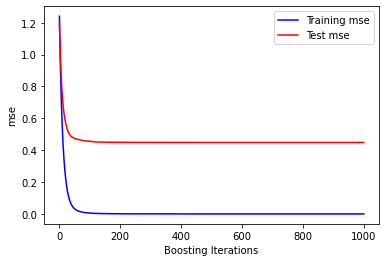

In [20]:
plt.plot(np.arange(GBM.n_estimators) + 1, GBM.train_score_, 'b-',
         label='Training mse')
plt.plot(np.arange(GBM.n_estimators) + 1, test_score, 'r-',
         label='Test mse')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('mse');

> Est-il ici pertinent de faire du "early stopping" i.e. considérer une somme tronquée du prédicteur boosting pour contrôler le sur-apprentissage ?

Ici, on regarde la courbe du "Test MSE" qui diminue parallèlement à la diminution du Training MSE" ce qui est naturel. Donc, il n'y a pas besoin de faire du "early stopping". Après, on peut arrêter au bout de 100 itérations afin d'augmenter la performance du modèle.

> Superposer quelques trajectoires pour plusieurs valeurs du learning rate.

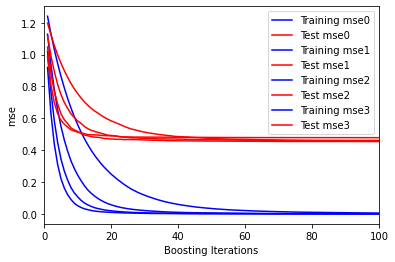

In [26]:
### TODO ###
lr = [0.05, 0.1, 0.15, 0.2]
GBM = []
for i,l in enumerate(lr) :
    GBM.append(GradientBoostingRegressor(n_estimators=1000,
                                            max_depth=8,
                                            min_samples_split= 4,
                                            learning_rate= l,
                                            loss='squared_error'))
    GBM[i].fit(X_housing_train, y_housing_train)   

    test_score = []
    for y_pred in  GBM[i].staged_predict(X_housing_test):
        test_score.append(GBM[i].loss_(y_pred, y_housing_test))
    #dessin
    plt.plot(np.arange(GBM[i].n_estimators) + 1, GBM[i].train_score_, 'b-',
            label='Training mse'+str(i))
    plt.plot(np.arange(GBM[i].n_estimators) + 1, test_score, 'r-',
            label='Test mse'+str(i))
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('mse')
    xlim(0,100)


#### Choix des paramètres du GBM

> Pour `n_estimators=300` et `learning_rate=0.1`, effectuer une recherche avec par `GridSearch()` pour choisir `max_depth` et  `min_samples_split`. Faire cette recherche en "cross validant" uniquement l'échantillon d'apprentissage de façon à garder des données pour évaluer les performances du modèle finalement sélectionné.

In [ ]:
max_depth_values= [2,4,6,8] 
min_samples_split_values= [2,3,4]

import multiprocessing
multiprocessing.cpu_count()

In [ ]:
from sklearn.model_selection import GridSearchCV

GBM = ### TODO ###
param_grid = dict(m### TODO ###)
grid_search = GridSearchCV(### TODO ###)
grid_result = grid_search.fit(### TODO ###)

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

> Une fois ces valeurs choisies, diminuer le learning rate et augmenter le nombre d'itérations pour essayer d'améliorer encore les performances.

In [ ]:
### TODO ###

> Calculer le $R^2$ et l'erreur de test pour le modèle final

In [ ]:
grid_result.best_estimator_.score(### TODO ###)

In [ ]:
mean_squared_error(### TODO ###)

#### Indices d'importance

> Il est aussi possible de calculer des indices d'importances pour les GMB avec la méthode `feature_importances_`. Comparer les importances du modèle GMB obtenu avec celles obtenues précédemment pour les forêts aléatoires.

In [ ]:
GBMbest = grid_result.best_estimator_

In [ ]:
# On commence ajuster le modele choisi sur toutes les données:
GBMbest.fit(X_housing,Y_housing);

In [ ]:
feature_importance = GBMbest.feature_importances_
### TODO : affichage ###

##  XGboost

Si nécessaire, installer la librairie [`xgboost`](https://xgboost.readthedocs.io/en/latest/install.html). 

In [ ]:
from xgboost import XGBRegressor

Nous allons utilser Xgboost avec pour classifieurs faibles des arbres (on pourait aussi utiliser aussi des modèles linéaires basés sur peu de variabes).

Les paramètres de Xgboost, notamment pour les fonctions `XGBRegressor()` et `XGBClassifier()`, sont décrits dans [cette page](http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn). Elles sont similaires aux commdandes des fonctions de sckit-learn.

In [ ]:
XGBR = XGBRegressor()
XGBR.fit(X_housing_train, y_housing_train)
y_pred = XGBR.predict(X_housing_test)
XGBR

> Donner le score $R^2$ et l'erreur mse. Comparer avec GBM.

Les remarques précedentes sur les reglages des paramètres de GBM sont encore vraies pour Xgboost. Il faut en plus ajuster les paramètres `alpha`  et `lambda` des termes de régularisation.

> Choisir les paramètres de Xgboost.

D'abord avec un learning rate pas trop faible.

In [ ]:
max_depth= [2,4,6,8] 
min_child_weight = [2,4]
reg_alpha=  [0,0.1,1,2]
reg_lambda = [0,0.1,1,2]
### TODO ###

Et maintenant avec des learning rates plus petits:

In [ ]:
learning_rate = [0.001, 0.01,0.05]
n_estimators = [100,500,1000]

In [ ]:
### TODO ###

In [ ]:
### TODO : Graphe de la mse ###

 :

## Implémentation du Boosting Regressor 

> Implémenter votre propore fonction Tree Boosting Regressor, on considérant la perte $\ell_2$. On pourra pour cela, à chaque itération, 
ajuster un arbre de régression (de faible prodondeur) sur les résidus courants, à l'aide de la fonction `tree.DecisionTreeRegressor()` . L'étape 5 de l'Algorithme 6 "Gradient Tree Boosting Regressor Algorithm" donné en cours est-elle nécessaire dans ce contexte ? 


In [ ]:
### TODO ###